In [9]:
import os
import numpy as np
from collections import defaultdict
import pandas as pd
import matplotlib.pyplot as plt
import json
%matplotlib inline

from tensorboard.backend.event_processing import event_accumulator
from collections import defaultdict
import seaborn as sns

In [10]:
experiments = {
 'dqn_sharing': [],
 'dqn_prio_sharing': [],
 'dqn_prio_focus_sharing': [],
 'dqn_focus_sharing': [],
 'dqn': [],
 'dqn_prio': []
}

# list experiments
root = "/mnt/storage/log-experiments/runs/masters-detailed-3/"
for folder, files in experiments.items():
    path = os.path.join(root, folder)
    if folder == 'dqn' or folder == 'dqn_prio':
        for i in range(40):
            trial_name = 'agent-trial' + str(i)
            trial_path = os.path.join(path, trial_name)
            # get the last file and append to files
            res = list(sorted(os.listdir(trial_path)))[-1]
            files.append(os.path.join(trial_path, res))
    else:            
        for i in range(20):
            trial_name = 'agent0-trial' + str(i)
            trial_path = os.path.join(path, trial_name)
            # get the last file and append to files
            res = list(sorted(os.listdir(trial_path)))[-1]
            files.append(os.path.join(trial_path, res))
        for i in range(20):
            trial_name = 'agent1-trial' + str(i)
            trial_path = os.path.join(path, trial_name)
            # get the last file and append to files
            res = list(sorted(os.listdir(trial_path)))[-1]
            files.append(os.path.join(trial_path, res))


In [11]:
# experiments['dqn']

In [14]:
tb ='/mnt/storage/log-experiments/runs/masters-detailed-3/dqn/agent-trial0/events.out.tfevents.1547139411.Cerebro'
ea = event_accumulator.EventAccumulator(tb)
ea.Reload()
metric = 'reward/episode'
data = ea.Scalars(metric)
data[0].step, data[0].value

(1, 21.0)

In [26]:
data

[ScalarEvent(wall_time=1547139411.3868058, step=1, value=21.0),
 ScalarEvent(wall_time=1547139411.4899387, step=2, value=12.0),
 ScalarEvent(wall_time=1547139411.5205908, step=3, value=11.0),
 ScalarEvent(wall_time=1547139411.5437105, step=4, value=15.0),
 ScalarEvent(wall_time=1547139411.5625253, step=5, value=15.0),
 ScalarEvent(wall_time=1547139411.5853252, step=6, value=18.0),
 ScalarEvent(wall_time=1547139411.6078746, step=7, value=18.0),
 ScalarEvent(wall_time=1547139411.672045, step=8, value=51.0),
 ScalarEvent(wall_time=1547139411.702874, step=9, value=24.0),
 ScalarEvent(wall_time=1547139411.7334425, step=10, value=24.0),
 ScalarEvent(wall_time=1547139411.7998307, step=11, value=52.0),
 ScalarEvent(wall_time=1547139411.8194053, step=12, value=15.0),
 ScalarEvent(wall_time=1547139411.855318, step=13, value=28.0),
 ScalarEvent(wall_time=1547139411.9137416, step=14, value=45.0),
 ScalarEvent(wall_time=1547139411.9593658, step=15, value=35.0),
 ScalarEvent(wall_time=1547139411.992

In [32]:
len(data)

343

In [35]:
test= []
for e in data:
    test.append(e.value)
for idx in range(len(data)+1, 501):
    test.append(idx)
len(test)

500

In [24]:
# test

In [83]:
experiments.keys()

dict_keys(['dqn_sharing', 'dqn_prio_sharing', 'dqn_prio_focus_sharing', 'dqn_focus_sharing', 'dqn', 'dqn_prio'])

In [ ]:
# don't run again for now
# metric = 'reward/episode'
# data = {k:defaultdict(list) for k in experiments.keys()}
# for exp, runs in experiments.items():
#     for run in runs:
#         ea = event_accumulator.EventAccumulator(run)
#         ea.Reload()
#         events = ea.Scalars(metric)
#         for e in events:
#             data[exp][e.step].append(e.value)
            

In [84]:
for exp, runs in experiments.items():
    print(exp)

dqn_sharing
dqn_prio_sharing
dqn_prio_focus_sharing
dqn_focus_sharing
dqn
dqn_prio


In [89]:
# don't run again for now
metric = 'reward/episode'
data = {k:defaultdict(list) for k in experiments.keys()}
for exp, runs in experiments.items():
    for run in runs:
        ea = event_accumulator.EventAccumulator(run)
        ea.Reload()
        events = ea.Scalars(metric)
        for e in events:
            data[exp][e.step].append(e.value)
        # in each run, if there are less episodes than 500, add manually
        for idx in range(len(events)+1, 501):
            data[exp][idx].append(200.0)
            

In [90]:
# check if it is really an integer
# and check if sorting is going to work out

In [91]:
import matplotlib
matplotlib.rc('xtick', labelsize=14)
matplotlib.rc('ytick', labelsize=14)
plt.rcParams.update({'font.size': 14})
plt.rcParams.update({"axes.grid": True, "grid.linewidth": 0.75})

In [92]:
experiments_labels = {
    'dqn_sharing': 'DQN + Naive ES',
    'dqn_prio_sharing': 'DQN-PR + Prioritized ES', 
    'dqn_prio_focus_sharing': 'DQN-PR + Prioritized Focused ES', 
    'dqn_focus_sharing': 'DQN + Focused ES', 
    'dqn': 'DQN',
    'dqn_prio': 'DQN-PR',
}

In [93]:
data.keys()

dict_keys(['dqn_sharing', 'dqn_prio_sharing', 'dqn_prio_focus_sharing', 'dqn_focus_sharing', 'dqn', 'dqn_prio'])

In [94]:
# variation, with dataframe, to try and use seaborn plot 
# this should be a better way of doing this
# but we have yet to see how it works
# it is taking a long time to open all those runs
long =[]
experiment_keys = ['dqn', 'dqn_sharing', 'dqn_focus_sharing', 'dqn_prio', 'dqn_prio_sharing', 'dqn_prio_focus_sharing']
for exp in experiment_keys:
    steps = data[exp]
    for step, values in sorted(steps.items(), key=lambda x:x[0]):
        for value in values:
            long.append(
                {
                    'algorithm': experiments_labels[exp],
                    'episode': int(step),
                    'reward': value
                }
            )

df = pd.DataFrame.from_dict(long)

In [95]:
df[df['algorithm']=='DQN-PR'][df['episode']==100].head(30)

/home/lucas/.conda/envs/marlo/lib/python3.6/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


,algorithm,episode,reward
64901,DQN-PR,100,33.0
64902,DQN-PR,100,200.0
64903,DQN-PR,100,200.0
64904,DQN-PR,100,200.0
64905,DQN-PR,100,200.0
64906,DQN-PR,100,200.0
64907,DQN-PR,100,114.0
64908,DQN-PR,100,158.0
64909,DQN-PR,100,200.0
64910,DQN-PR,100,185.0


In [96]:
# filter data
regular = ['DQN','DQN + Naive ES','DQN + Focused ES']
prio = ['DQN-PR','DQN-PR + Prioritized ES', 'DQN-PR + Prioritized Focused ES']
best = ['DQN + Focused ES', 'DQN-PR + Prioritized Focused ES']


/home/lucas/.conda/envs/marlo/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


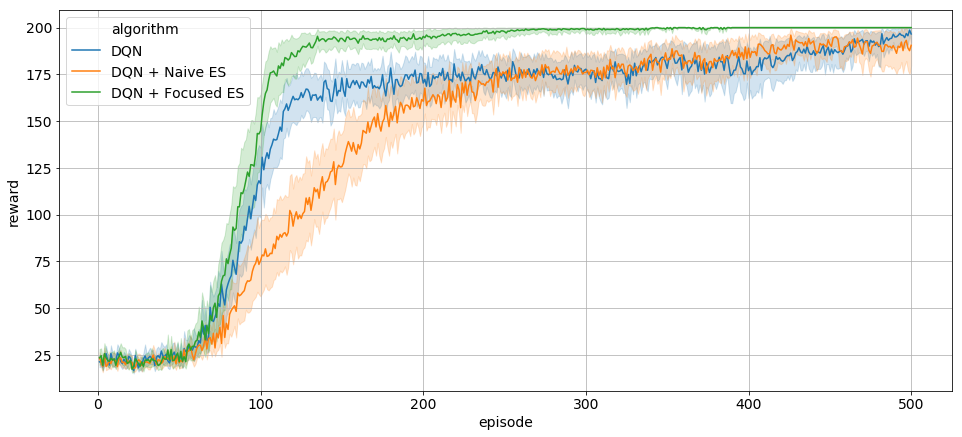

In [101]:
df_plot = df[df['episode'] <= 500] # change later with more data
df_plot = df_plot[df_plot['algorithm'].isin(regular)]

plt.figure(figsize=(16,7))
sns.lineplot(x='episode', y='reward', hue='algorithm', data=df_plot, legend="brief")
plt.savefig('rewards-regulardqn.png', dpi=200, bbox_inches='tight')

/home/lucas/.conda/envs/marlo/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


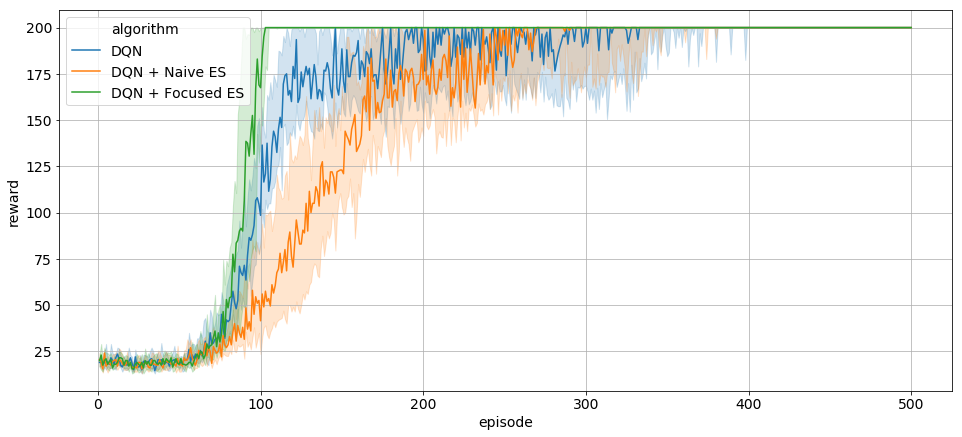

In [98]:
df_plot = df[df['episode'] <= 500] # change later with more data
df_plot = df_plot[df_plot['algorithm'].isin(regular)]

plt.figure(figsize=(16,7))
sns.lineplot(x='episode', y='reward', hue='algorithm', data=df_plot, legend="brief", estimator=np.median)
plt.savefig('rewards-regulardqn.png', dpi=200, bbox_inches='tight')

/home/lucas/.conda/envs/marlo/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


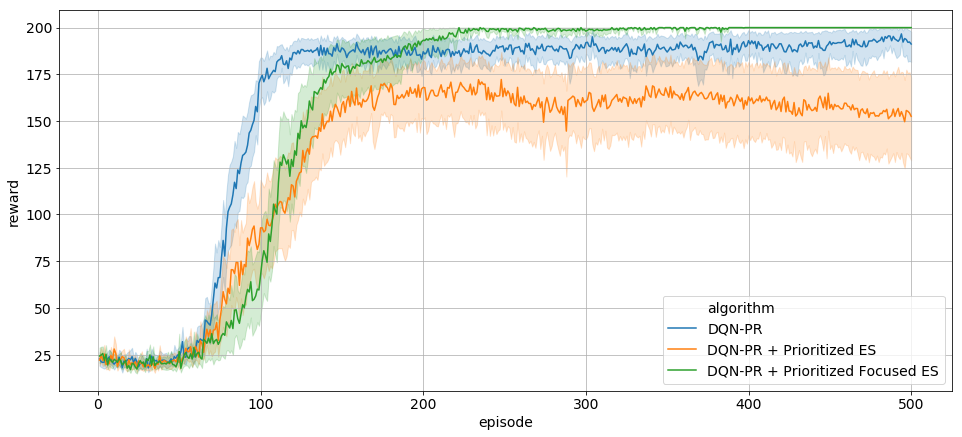

In [102]:
df_plot = df[df['episode'] <= 500] # change later with more data
df_plot = df_plot[df_plot['algorithm'].isin(prio)]

plt.figure(figsize=(16,7))
sns.lineplot(x='episode', y='reward', hue='algorithm', data=df_plot, legend="brief")
plt.savefig('rewards-priodqn.png', dpi=200, bbox_inches='tight')

/home/lucas/.conda/envs/marlo/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


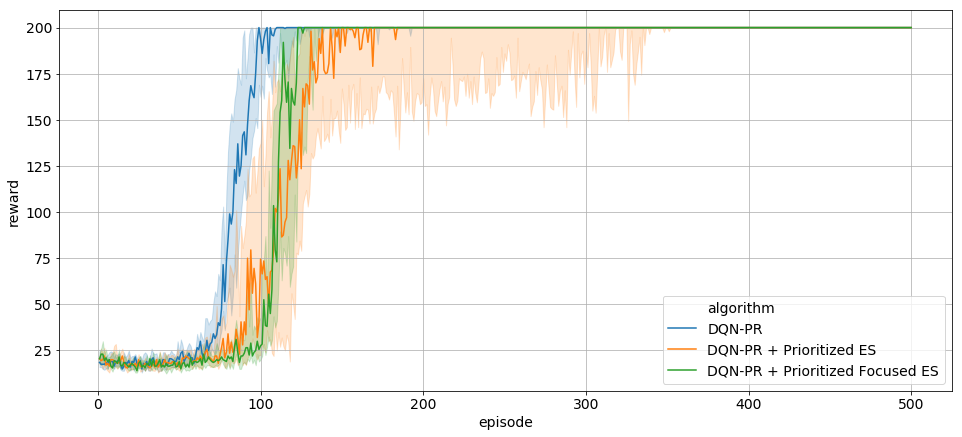

In [100]:
df_plot = df[df['episode'] <= 500] # change later with more data
df_plot = df_plot[df_plot['algorithm'].isin(prio)]

plt.figure(figsize=(16,7))
sns.lineplot(x='episode', y='reward', hue='algorithm', data=df_plot, legend="brief", estimator=np.median)
plt.savefig('rewards-priodqn.png', dpi=200, bbox_inches='tight')